<a href="https://colab.research.google.com/github/sakshamkumarsingh11/Multi-churn-prediction-application/blob/main/telecom_part_multichurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


sns.set_theme(style="whitegrid", palette="muted")

In [ ]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

In [ ]:
print(f" Dataset loaded — Shape: {df.shape}")
print(f"   Rows: {df.shape[0]:,}  |  Columns: {df.shape[1]}")


 Dataset loaded — Shape: (7043, 21)
   Rows: 7,043  |  Columns: 21


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
display(df.describe(include='all'))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:

column_info = {
    "customerID"       : "Unique ID — will be dropped",
    "gender"           : "Male / Female",
    "SeniorCitizen"    : "0 or 1 (already numeric)",
    "Partner"          : "Yes / No",
    "Dependents"       : "Yes / No",
    "tenure"           : "Months with company (numeric)",
    "PhoneService"     : "Yes / No",
    "MultipleLines"    : "Yes / No / No phone service",
    "InternetService"  : "DSL / Fiber optic / No",
    "OnlineSecurity"   : "Yes / No / No internet service",
    "OnlineBackup"     : "Yes / No / No internet service",
    "DeviceProtection" : "Yes / No / No internet service",
    "TechSupport"      : "Yes / No / No internet service",
    "StreamingTV"      : "Yes / No / No internet service",
    "StreamingMovies"  : "Yes / No / No internet service",
    "Contract"         : "Month-to-month / One year / Two year",
    "PaperlessBilling" : "Yes / No",
    "PaymentMethod"    : "4 payment types",
    "MonthlyCharges"   : "Monthly bill amount (numeric)",
    "TotalCharges"     : "Total bill so far — WATCH OUT: stored as string!",
    "Churn"            : "TARGET: Yes / No"
}

for col, desc in column_info.items():
    print(f"  {col:<22} → {desc}")


  customerID             → Unique ID — will be dropped
  gender                 → Male / Female
  SeniorCitizen          → 0 or 1 (already numeric)
  Partner                → Yes / No
  Dependents             → Yes / No
  tenure                 → Months with company (numeric)
  PhoneService           → Yes / No
  MultipleLines          → Yes / No / No phone service
  InternetService        → DSL / Fiber optic / No
  OnlineSecurity         → Yes / No / No internet service
  OnlineBackup           → Yes / No / No internet service
  DeviceProtection       → Yes / No / No internet service
  TechSupport            → Yes / No / No internet service
  StreamingTV            → Yes / No / No internet service
  StreamingMovies        → Yes / No / No internet service
  Contract               → Month-to-month / One year / Two year
  PaperlessBilling       → Yes / No
  PaymentMethod          → 4 payment types
  MonthlyCharges         → Monthly bill amount (numeric)
  TotalCharges           → Total b

In [ ]:
##checking for the missing value
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
}).sort_values('Missing Count', ascending=False)


In [ ]:
missing_df

,Missing Count,Missing %
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [ ]:
print(missing_df[missing_df['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [ ]:
print("\n▶ Unique values in TotalCharges (first 10 non-numeric):")
print(df['TotalCharges'].unique()[:15])


▶ Unique values in TotalCharges (first 10 non-numeric):
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05']


In [ ]:
hidden_missing = df[df['TotalCharges'].str.strip() == ''].shape[0]
print(f"\n Hidden empty strings in TotalCharges: {hidden_missing}")


 Hidden empty strings in TotalCharges: 11


In [ ]:
# Replace empty strings with NaN, then convert to float
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Check how many became NaN
print(f"NaN in TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")


NaN in TotalCharges after conversion: 11


In [ ]:
# Inspect these rows — they are new customers (tenure = 0)
print("\nRows with NaN TotalCharges:")
display(df[df['TotalCharges'].isnull()][['customerID','tenure','MonthlyCharges','TotalCharges','Churn']])



Rows with NaN TotalCharges:


,customerID,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,52.55,NaN,No
753,3115-CZMZD,0,20.25,NaN,No
936,5709-LVOEQ,0,80.85,NaN,No
1082,4367-NUYAO,0,25.75,NaN,No
1340,1371-DWPAZ,0,56.05,NaN,No
3331,7644-OMVMY,0,19.85,NaN,No
3826,3213-VVOLG,0,25.35,NaN,No
4380,2520-SGTTA,0,20.00,NaN,No
5218,2923-ARZLG,0,19.70,NaN,No
6670,4075-WKNIU,0,73.35,NaN,No


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(f"\nTotalCharges fixed — dtype: {df['TotalCharges'].dtype}")



TotalCharges fixed — dtype: float64


In [ ]:
df.drop(columns=['customerID'], inplace=True)
print("✅ Dropped: customerID (not useful for prediction)")
print(f"   Remaining columns: {df.shape[1]}")


✅ Dropped: customerID (not useful for prediction)
   Remaining columns: 20


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Churn: Yes → 1  |  No → 0")
print(f"\n Churn distribution:")
print(df['Churn'].value_counts())
print(f"\n Churn rate: {df['Churn'].mean()*100:.2f}%")


Churn: Yes → 1  |  No → 0

 Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

 Churn rate: 26.54%


In [ ]:
# Already numeric
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

# Binary categorical (Yes/No → 0/1)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Multi-class categorical (need encoding)
multiclass_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

In [ ]:
print(f"  Numeric cols    : {numeric_cols}")
print(f"  Binary cols     : {binary_cols}")
print(f"  Multiclass cols : {multiclass_cols}")



  Numeric cols    : ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
  Binary cols     : ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
  Multiclass cols : ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
#encoding binary columns
# gender: Female=0, Male=1
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

# Rest: No=0, Yes=1
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    df[col] = df[col].map({'No': 0, 'Yes': 1})


print(df[binary_cols].head(3))


   gender  Partner  Dependents  PhoneService  PaperlessBilling
0       0        1           0             0                 1
1       1        0           0             1                 0
2       1        0           0             1                 1


In [ ]:
print(f"Shape before encoding: {df.shape}")
df = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)
print(f"Shape after encoding : {df.shape}")
print([col for col in df.columns if '_' in col and col not in ['MonthlyCharges', 'TotalCharges']])


Shape before encoding: (7043, 20)
Shape after encoding : (7043, 31)
['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
# Only scale continuous numeric columns
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Scaled: tenure, MonthlyCharges, TotalCharges")
print(f"\n▶ After scaling stats:")
print(df[cols_to_scale].describe().round(3))



Scaled: tenure, MonthlyCharges, TotalCharges

▶ After scaling stats:
         tenure  MonthlyCharges  TotalCharges
count  7043.000        7043.000      7043.000
mean     -0.000          -0.000        -0.000
std       1.000           1.000         1.000
min      -1.318          -1.546        -1.006
25%      -0.952          -0.973        -0.830
50%      -0.137           0.186        -0.391
75%       0.921           0.834         0.665
max       1.614           1.794         2.826


In [ ]:
print(f" Final shape: {df.shape}")
print(f" Any nulls  : {df.isnull().sum().sum()}")
print(f" Dtypes     :")
print(df.dtypes.value_counts())
print(f"\n First 3 rows of preprocessed data:")
display(df.head(3))


 Final shape: (7043, 31)
 Any nulls  : 0
 Dtypes     :
bool       21
int64       7
float64     3
Name: count, dtype: int64

 First 3 rows of preprocessed data:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y          # ensures same churn ratio in both splits
)

In [ ]:
print(f" X_train : {X_train.shape}")
print(f" X_test  : {X_test.shape}")
print(f" y_train churn rate: {y_train.mean()*100:.2f}%")
print(f" y_test  churn rate: {y_test.mean()*100:.2f}%")

 X_train : (5634, 30)
 X_test  : (1409, 30)
 y_train churn rate: 26.54%
 y_test  churn rate: 26.54%


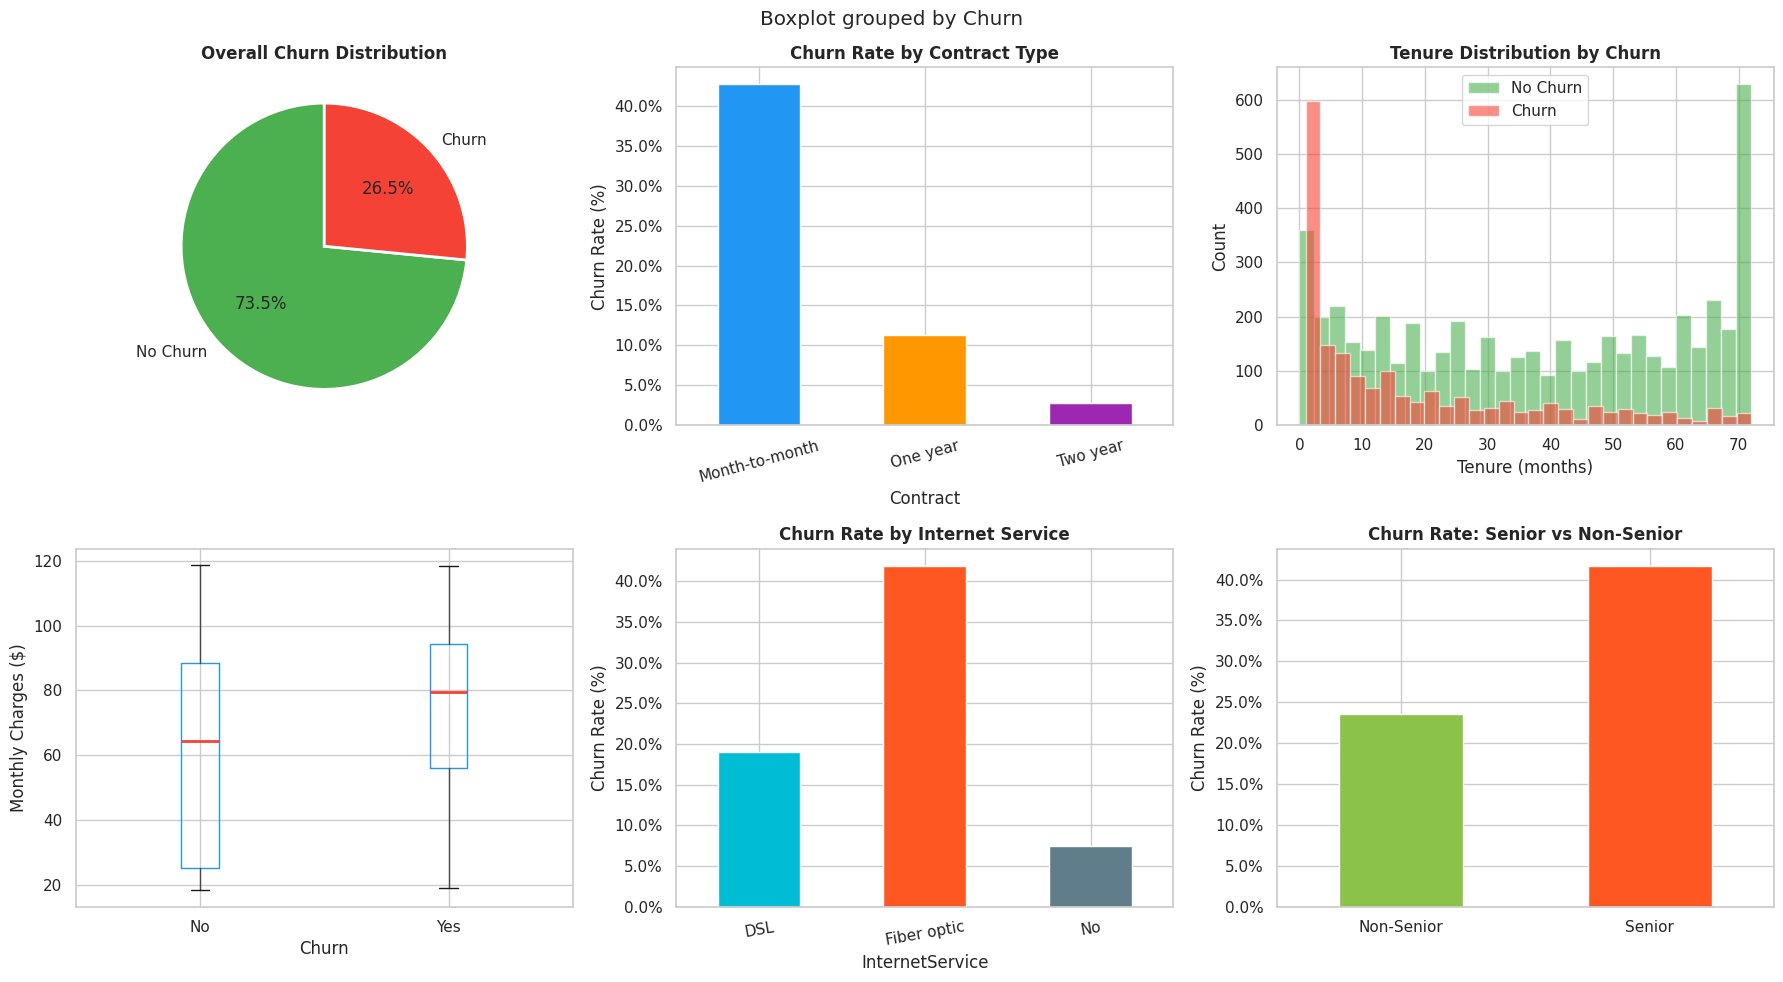


EDA charts saved as telecom_eda.png


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Telecom Churn — EDA Overview', fontsize=16, fontweight='bold', y=1.02)
#churn distribution
churn_counts = y.value_counts()
axes[0,0].pie(
    churn_counts,
    labels=['No Churn', 'Churn'],
    autopct='%1.1f%%',
    colors=['#4CAF50', '#F44336'],
    startangle=90,
    wedgeprops={'edgecolor':'white', 'linewidth':2}
)
axes[0,0].set_title('Overall Churn Distribution', fontweight='bold')

#plot 2
df_raw = pd.read_csv(url) if 'url' in dir() else df.copy()
try:
    df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce').fillna(0)
    contract_churn = df_raw.groupby('Contract')['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    )
    contract_churn.plot(kind='bar', ax=axes[0,1], color=['#2196F3','#FF9800','#9C27B0'], edgecolor='white')
    axes[0,1].set_title('Churn Rate by Contract Type', fontweight='bold')
    axes[0,1].set_ylabel('Churn Rate (%)')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=15)
    axes[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())
except:
    axes[0,1].set_title('Contract vs Churn (load raw data)')
#plot 3- tenure distribution
axes[0,2].set_title('Tenure Distribution by Churn', fontweight='bold')
try:
    df_raw['Churn_bin'] = (df_raw['Churn'] == 'Yes').astype(int)
    df_raw[df_raw['Churn_bin']==0]['tenure'].hist(
        ax=axes[0,2], bins=30, alpha=0.6, color='#4CAF50', label='No Churn')
    df_raw[df_raw['Churn_bin']==1]['tenure'].hist(
        ax=axes[0,2], bins=30, alpha=0.6, color='#F44336', label='Churn')
    axes[0,2].set_xlabel('Tenure (months)')
    axes[0,2].set_ylabel('Count')
    axes[0,2].legend()
except:
    pass
    #plot4
#monthly charges by churn

axes[1,0].set_title('Monthly Charges by Churn', fontweight='bold')
try:
    df_raw.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1,0],
                   boxprops=dict(color='#2196F3'),
                   medianprops=dict(color='#F44336', linewidth=2))
    axes[1,0].set_xlabel('Churn')
    axes[1,0].set_ylabel('Monthly Charges ($)')
    plt.sca(axes[1,0])
    plt.title('')
except:
    pass

    # ── Plot 5: Internet Service vs Churn ──
try:
    internet_churn = df_raw.groupby('InternetService')['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    )
    internet_churn.plot(kind='bar', ax=axes[1,1], color=['#00BCD4','#FF5722','#607D8B'], edgecolor='white')
    axes[1,1].set_title('Churn Rate by Internet Service', fontweight='bold')
    axes[1,1].set_ylabel('Churn Rate (%)')
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=10)
    axes[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())
except:
    pass

# ── Plot 6: Senior Citizen vs Churn ──
try:
    senior_churn = df_raw.groupby('SeniorCitizen')['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    )
    senior_churn.index = ['Non-Senior', 'Senior']
    senior_churn.plot(kind='bar', ax=axes[1,2], color=['#8BC34A','#FF5722'], edgecolor='white')
    axes[1,2].set_title('Churn Rate: Senior vs Non-Senior', fontweight='bold')
    axes[1,2].set_ylabel('Churn Rate (%)')
    axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=0)
    axes[1,2].yaxis.set_major_formatter(mtick.PercentFormatter())
except:
    pass

plt.tight_layout()
plt.savefig('telecom_eda.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nEDA charts saved as telecom_eda.png")


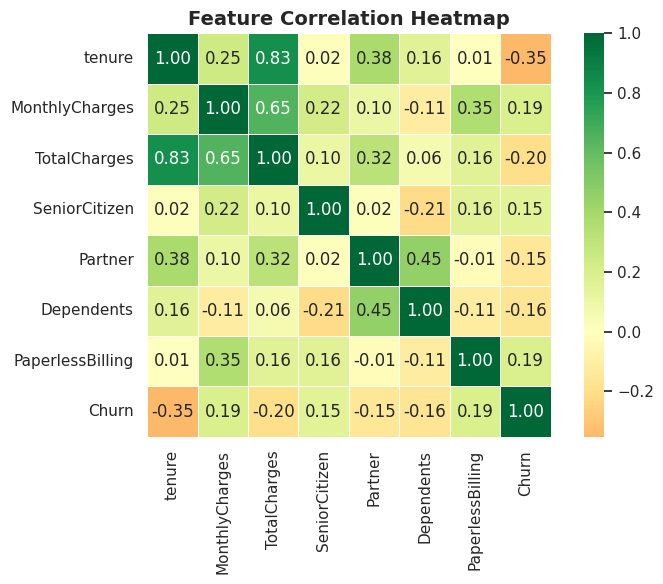

 Heatmap saved as telecom_correlation.png


In [ ]:
# corelation heatmap
plt.figure(figsize=(8, 6))
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
             'Partner', 'Dependents', 'PaperlessBilling', 'Churn']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('telecom_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
print(" Heatmap saved as telecom_correlation.png")


In [ ]:
df.to_csv('telecom_preprocessed.csv', index=False)
print(" Saved: telecom_preprocessed.csv")
print(f"   Shape : {df.shape}")
print(f"   Size  : {df.memory_usage().sum() / 1024:.1f} KB")

# Also save train/test splits
X_train.to_csv('X_train_telecom.csv', index=False)
X_test.to_csv('X_test_telecom.csv', index=False)
y_train.to_csv('y_train_telecom.csv', index=False)
y_test.to_csv('y_test_telecom.csv', index=False)
print(" Saved: X_train, X_test, y_train, y_test CSV files")



 Saved: telecom_preprocessed.csv
   Shape : (7043, 31)
   Size  : 694.8 KB
 Saved: X_train, X_test, y_train, y_test CSV files


# Modeling


In [ ]:
# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE

# XGBoost
from xgboost import XGBClassifier

# Save model
import joblib

sns.set_theme(style="whitegrid")

In [ ]:
X_train = pd.read_csv('X_train_telecom.csv')
X_test  = pd.read_csv('X_test_telecom.csv')
y_train = pd.read_csv('y_train_telecom.csv').squeeze()
y_test  = pd.read_csv('y_test_telecom.csv').squeeze()


In [ ]:
print(f" X_train : {X_train.shape}")
print(f" X_test  : {X_test.shape}")
print(f" Churn rate in train: {y_train.mean()*100:.2f}%")
print(f" Churn rate in test : {y_test.mean()*100:.2f}%")


 X_train : (5634, 30)
 X_test  : (1409, 30)
 Churn rate in train: 26.54%
 Churn rate in test : 26.54%


Before SMOTE — Class 0: 4139  |  Class 1: 1495
After  SMOTE — Class 0: 4139  |  Class 1: 4139
 Classes balanced — no bias toward majority class


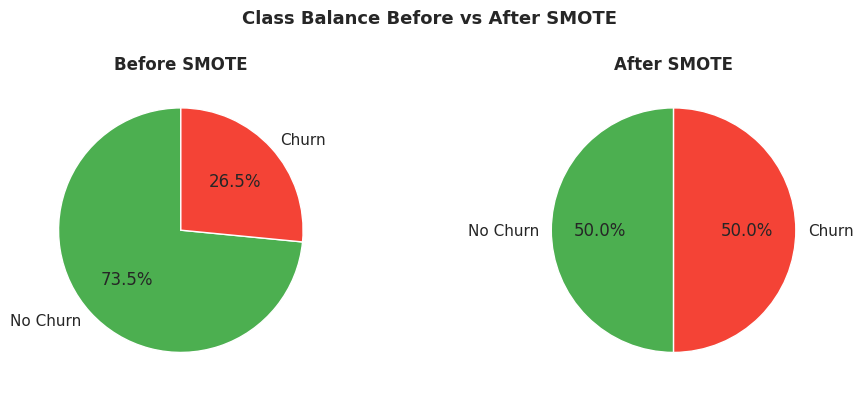

In [ ]:
#handling class imbalance with smote
print(f"Before SMOTE — Class 0: {(y_train==0).sum()}  |  Class 1: {(y_train==1).sum()}")

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"After  SMOTE — Class 0: {(y_train_sm==0).sum()}  |  Class 1: {(y_train_sm==1).sum()}")
print(" Classes balanced — no bias toward majority class")

# Visualize before/after
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].pie([( y_train==0).sum(), (y_train==1).sum()],
            labels=['No Churn','Churn'], autopct='%1.1f%%',
            colors=['#4CAF50','#F44336'], startangle=90)
axes[0].set_title('Before SMOTE', fontweight='bold')

axes[1].pie([(y_train_sm==0).sum(), (y_train_sm==1).sum()],
            labels=['No Churn','Churn'], autopct='%1.1f%%',
            colors=['#4CAF50','#F44336'], startangle=90)
axes[1].set_title('After SMOTE', fontweight='bold')
plt.suptitle('Class Balance Before vs After SMOTE', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('smote_balance.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    """Train, evaluate and return results for a model."""

    print(f"\n{'─'*50}")
    print(f"  MODEL: {name}")
    print(f"{'─'*50}")

    # Train
    model.fit(X_tr, y_tr)

    # Predict
    y_pred      = model.predict(X_te)
    y_pred_prob = model.predict_proba(X_te)[:, 1]

    # Metrics
    acc     = accuracy_score(y_te, y_pred)
    roc_auc = roc_auc_score(y_te, y_pred_prob)
    cv      = cross_val_score(model, X_tr, y_tr,
                              cv=StratifiedKFold(5), scoring='roc_auc')

    print(f"  Accuracy       : {acc*100:.2f}%")
    print(f"  ROC-AUC Score  : {roc_auc:.4f}")
    print(f"  CV ROC-AUC     : {cv.mean():.4f} ± {cv.std():.4f}")
    print(f"\n  Classification Report:")
    print(classification_report(y_te, y_pred, target_names=['No Churn','Churn']))

    return {
        'name'      : name,
        'model'     : model,
        'y_pred'    : y_pred,
        'y_prob'    : y_pred_prob,
        'accuracy'  : acc,
        'roc_auc'   : roc_auc,
        'cv_mean'   : cv.mean(),
        'cv_std'    : cv.std()
    }


In [ ]:
#logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_result = evaluate_model(
    "Logistic Regression",
    lr_model, X_train_sm, y_train_sm, X_test, y_test
)




──────────────────────────────────────────────────
  MODEL: Logistic Regression
──────────────────────────────────────────────────
  Accuracy       : 73.24%
  ROC-AUC Score  : 0.8219
  CV ROC-AUC     : 0.8789 ± 0.0267

  Classification Report:
              precision    recall  f1-score   support

    No Churn       0.87      0.74      0.80      1035
       Churn       0.50      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_result = evaluate_model(
    "Random Forest",
    rf_model, X_train_sm, y_train_sm, X_test, y_test
)



──────────────────────────────────────────────────
  MODEL: Random Forest
──────────────────────────────────────────────────
  Accuracy       : 75.59%
  ROC-AUC Score  : 0.8404
  CV ROC-AUC     : 0.8917 ± 0.0090

  Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.76      0.82      1035
       Churn       0.53      0.76      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
## xgboost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_result = evaluate_model(
    "XGBoost",
    xgb_model, X_train_sm, y_train_sm, X_test, y_test
)




──────────────────────────────────────────────────
  MODEL: XGBoost
──────────────────────────────────────────────────
  Accuracy       : 74.88%
  ROC-AUC Score  : 0.8340
  CV ROC-AUC     : 0.8940 ± 0.0183

  Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.76      0.82      1035
       Churn       0.52      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409




▶ Model Comparison Table:


,Model,Accuracy,ROC-AUC,CV ROC-AUC
0,Logistic Regression,73.24%,0.8219,0.8789 ± 0.0267
1,Random Forest,75.59%,0.8404,0.8917 ± 0.0090
2,XGBoost,74.88%,0.8340,0.8940 ± 0.0183


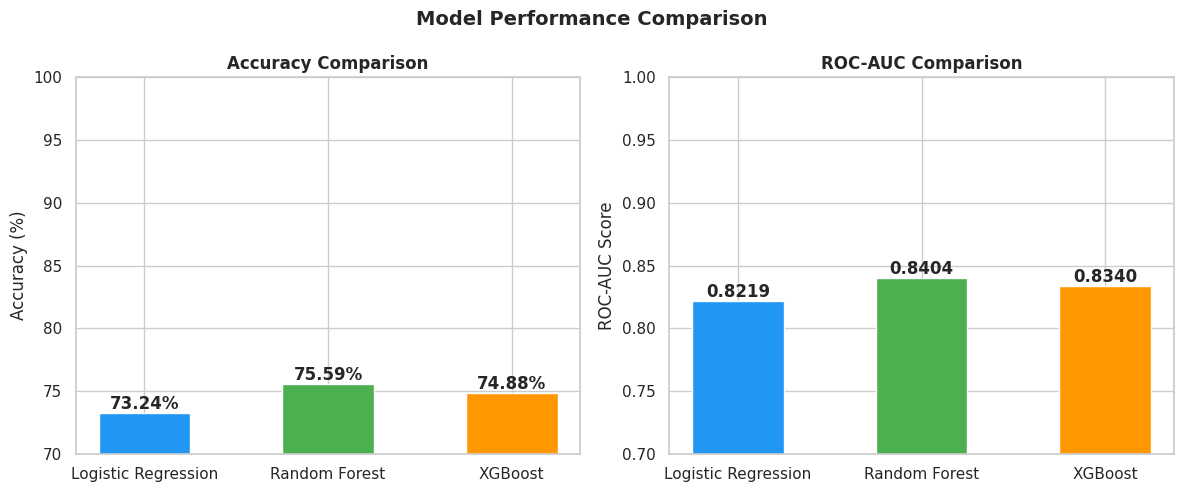

In [ ]:
#comparing

results = [lr_result, rf_result, xgb_result]

comparison_df = pd.DataFrame([{
    'Model'     : r['name'],
    'Accuracy'  : f"{r['accuracy']*100:.2f}%",
    'ROC-AUC'   : f"{r['roc_auc']:.4f}",
    'CV ROC-AUC': f"{r['cv_mean']:.4f} ± {r['cv_std']:.4f}"
} for r in results])

print("\n▶ Model Comparison Table:")
display(comparison_df)

# Bar chart comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

names    = [r['name'] for r in results]
accs     = [r['accuracy']*100 for r in results]
roc_aucs = [r['roc_auc'] for r in results]
colors   = ['#2196F3', '#4CAF50', '#FF9800']

axes[0].bar(names, accs, color=colors, edgecolor='white', width=0.5)
axes[0].set_title('Accuracy Comparison', fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(70, 100)
for i, v in enumerate(accs):
    axes[0].text(i, v+0.3, f'{v:.2f}%', ha='center', fontweight='bold')

axes[1].bar(names, roc_aucs, color=colors, edgecolor='white', width=0.5)
axes[1].set_title('ROC-AUC Comparison', fontweight='bold')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_ylim(0.7, 1.0)
for i, v in enumerate(roc_aucs):
    axes[1].text(i, v+0.003, f'{v:.4f}', ha='center', fontweight='bold')

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

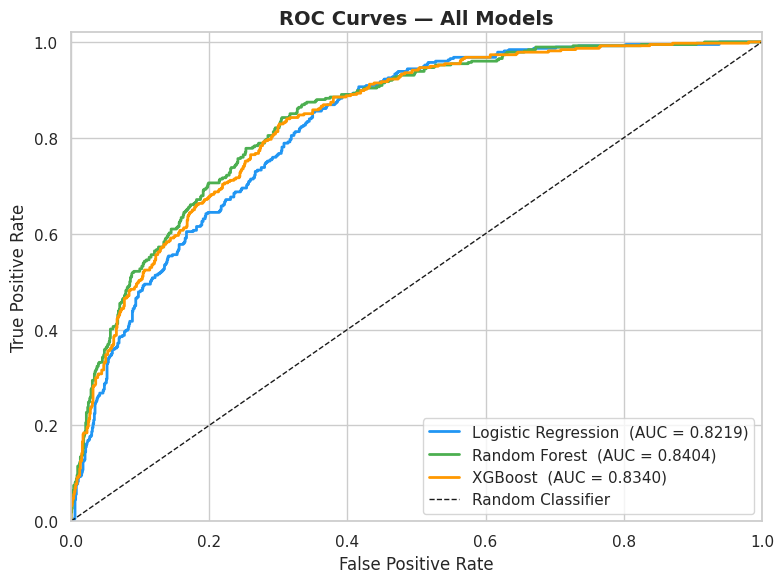

In [ ]:
#roc
plt.figure(figsize=(8, 6))
colors_roc = ['#2196F3', '#4CAF50', '#FF9800']

for r, c in zip(results, colors_roc):
    fpr, tpr, _ = roc_curve(y_test, r['y_prob'])
    plt.plot(fpr, tpr, color=c, lw=2,
             label=f"{r['name']}  (AUC = {r['roc_auc']:.4f})")

plt.plot([0,1],[0,1],'k--', lw=1, label='Random Classifier')
plt.xlim([0,1]); plt.ylim([0,1.02])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves — All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()


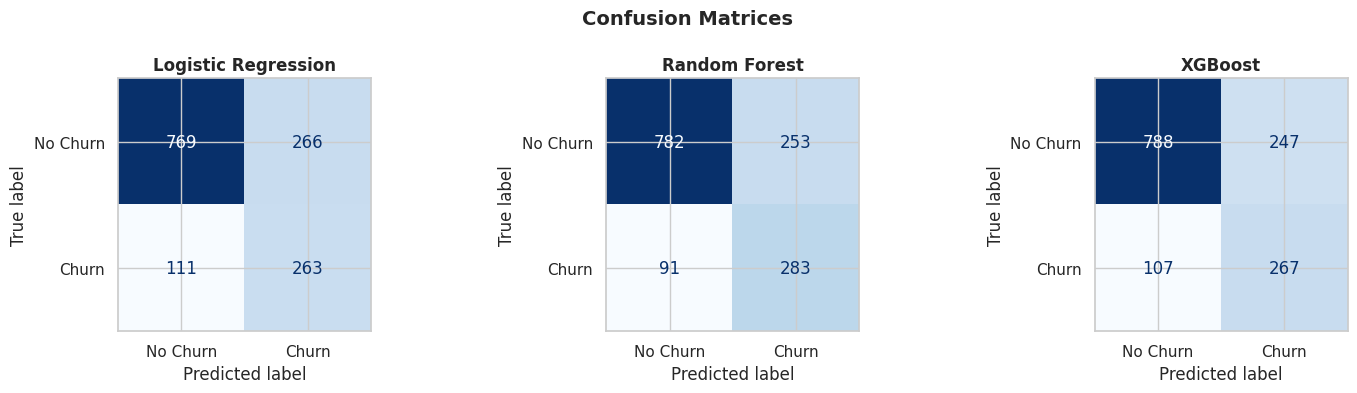

In [ ]:
#confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, r in zip(axes, results):
    cm = confusion_matrix(y_test, r['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=['No Churn','Churn'])
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_title(r['name'], fontweight='bold')

plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()


 Best Model: Random Forest  (ROC-AUC: 0.8404)


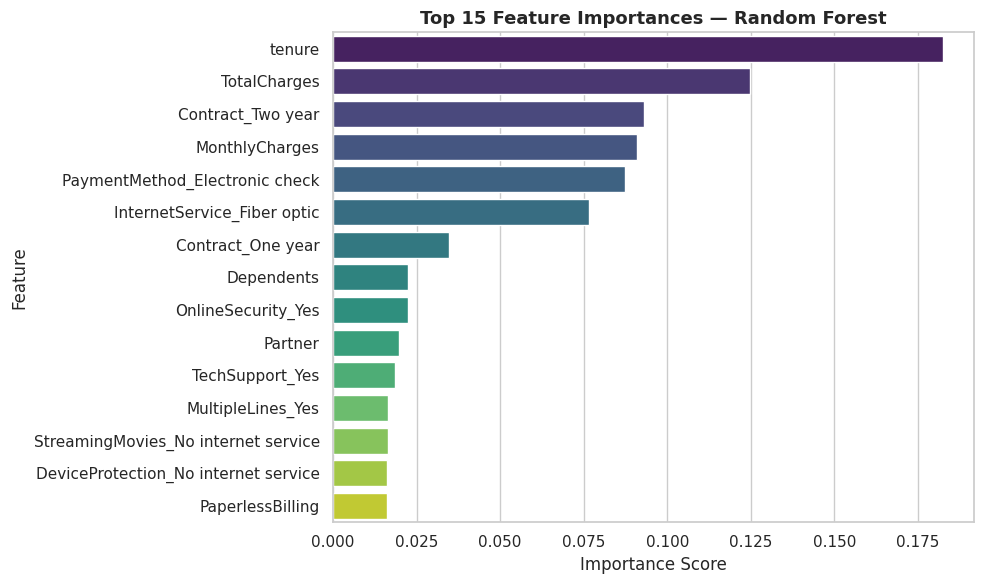


 Top 10 Features Driving Churn:


,Feature,Importance
4,tenure,0.182656
8,TotalCharges,0.124860
26,Contract_Two year,0.093123
7,MonthlyCharges,0.090956
28,PaymentMethod_Electronic check,0.087393
11,InternetService_Fiber optic,0.076485
25,Contract_One year,0.034736
3,Dependents,0.022529
14,OnlineSecurity_Yes,0.022314
2,Partner,0.019863


In [ ]:
# Pick best model by ROC-AUC
best_result = max(results, key=lambda x: x['roc_auc'])
best_model  = best_result['model']
print(f" Best Model: {best_result['name']}  (ROC-AUC: {best_result['roc_auc']:.4f})")

# Feature importance
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    importances = np.abs(best_model.coef_[0])
else:
    importances = np.zeros(X_train.shape[1])

feat_imp = pd.DataFrame({
    'Feature'   : X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature',
            palette='viridis', edgecolor='white')
plt.title(f'Top 15 Feature Importances — {best_result["name"]}',
          fontsize=13, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Top 10 Features Driving Churn:")
display(feat_imp.head(10))


 Sample Predictions with Risk & Suggestions:


,Churn_Probability,Actual_Churn,Risk_Level,Suggestion
0,0.0253,0,Low Risk 🟢,Customer is stable. Continue regular engagement.
1,0.8855,0,High Risk 🔴,"Urgent! Offer a discount, upgrade, or dedicate..."
2,0.1659,0,Low Risk 🟢,Customer is stable. Continue regular engagement.
3,0.5264,0,Medium Risk 🟡,Monitor this customer. Consider a loyalty rewa...
4,0.0305,0,Low Risk 🟢,Customer is stable. Continue regular engagement.
5,0.7589,0,High Risk 🔴,"Urgent! Offer a discount, upgrade, or dedicate..."
6,0.5875,0,Medium Risk 🟡,Monitor this customer. Consider a loyalty rewa...
7,0.1378,0,Low Risk 🟢,Customer is stable. Continue regular engagement.
8,0.0222,0,Low Risk 🟢,Customer is stable. Continue regular engagement.
9,0.5028,1,Medium Risk 🟡,Monitor this customer. Consider a loyalty rewa...



 Risk Distribution:
Risk_Level
Low Risk 🟢       720
High Risk 🔴      373
Medium Risk 🟡    316
Name: count, dtype: int64


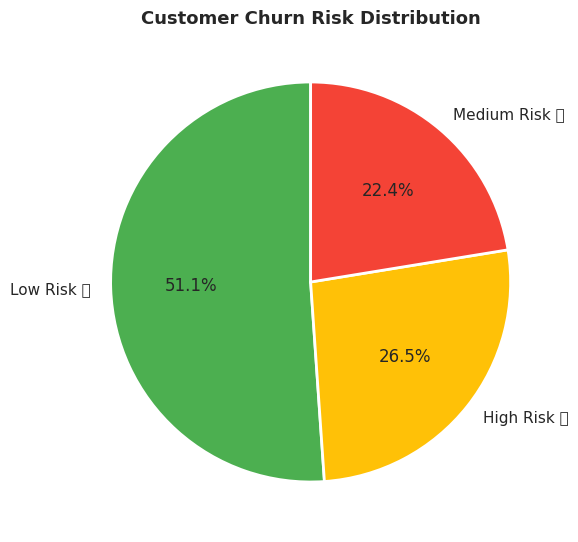

In [ ]:
#churn risk scoring function
def assign_risk(prob):
    """Convert churn probability to risk label."""
    if prob < 0.35:
        return 'Low Risk 🟢'
    elif prob < 0.65:
        return 'Medium Risk 🟡'
    else:
        return 'High Risk 🔴'

def get_suggestion(prob):
    """Return plain-English retention suggestion based on risk level."""
    if prob < 0.35:
        return "Customer is stable. Continue regular engagement."
    elif prob < 0.65:
        return "Monitor this customer. Consider a loyalty reward or check-in call."
    else:
        return "Urgent! Offer a discount, upgrade, or dedicated support immediately."

# Apply to test set
risk_df = pd.DataFrame({
    'Churn_Probability' : best_result['y_prob'].round(4),
    'Actual_Churn'      : y_test.values,
    'Risk_Level'        : [assign_risk(p) for p in best_result['y_prob']],
    'Suggestion'        : [get_suggestion(p) for p in best_result['y_prob']]
})

print("\n Sample Predictions with Risk & Suggestions:")
display(risk_df.head(15))

print("\n Risk Distribution:")
print(risk_df['Risk_Level'].value_counts())

# Risk distribution pie chart
plt.figure(figsize=(6, 6))
risk_counts = risk_df['Risk_Level'].value_counts()
colors_risk = ['#4CAF50', '#FFC107', '#F44336']
plt.pie(risk_counts.values, labels=risk_counts.index,
        autopct='%1.1f%%', colors=colors_risk,
        startangle=90, wedgeprops={'edgecolor':'white','linewidth':2})
plt.title('Customer Churn Risk Distribution', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('risk_distribution.png', dpi=150, bbox_inches='tight')
plt.show()



In [ ]:
# Save the best model
joblib.dump(best_model, 'telecom_churn_model.pkl')
joblib.dump(X_train.columns.tolist(), 'telecom_feature_columns.pkl')

print(f"Saved model   : telecom_churn_model.pkl")
print(f" Saved features: telecom_feature_columns.pkl")
print(f"\n   Model type : {type(best_model).__name__}")
print(f"   Features   : {X_train.shape[1]}")

# Test load
loaded_model = joblib.load('telecom_churn_model.pkl')
test_pred = loaded_model.predict_proba(X_test[:5])[:, 1]
print(f"\n Model reload test — sample probabilities: {test_pred.round(4)}")



Saved model   : telecom_churn_model.pkl
 Saved features: telecom_feature_columns.pkl

   Model type : RandomForestClassifier
   Features   : 30

 Model reload test — sample probabilities: [0.0253 0.8855 0.1659 0.5264 0.0305]


In [ ]:
total      = len(risk_df)
high_risk  = (risk_df['Risk_Level'] == 'High Risk 🔴').sum()
med_risk   = (risk_df['Risk_Level'] == 'Medium Risk 🟡').sum()
low_risk   = (risk_df['Risk_Level'] == 'Low Risk 🟢').sum()

print(f"""
  📊 ANALYSIS RESULTS — {total} Customers Analyzed
  ─────────────────────────────────────────────
  🔴 High Risk   : {high_risk} customers ({high_risk/total*100:.1f}%)
                   → Likely to leave soon. Act immediately.

  🟡 Medium Risk : {med_risk} customers ({med_risk/total*100:.1f}%)
                   → Showing warning signs. Monitor & engage.

  🟢 Low Risk    : {low_risk} customers ({low_risk/total*100:.1f}%)
                   → Currently stable. Maintain relationship.

  🏆 Best Model  : {best_result['name']}
  📈 Accuracy    : {best_result['accuracy']*100:.2f}%
  📈 ROC-AUC     : {best_result['roc_auc']:.4f}
  ─────────────────────────────────────────────
  💡 Top Churn Drivers (from feature importance):
     • Contract type (month-to-month = highest risk)
     • Tenure (new customers churn more)
     • Monthly charges (high bill = higher churn)
     • Internet service type (Fiber optic = risk)
     • Tech support availability
""")



  📊 ANALYSIS RESULTS — 1409 Customers Analyzed
  ─────────────────────────────────────────────
  🔴 High Risk   : 373 customers (26.5%)
                   → Likely to leave soon. Act immediately.

  🟡 Medium Risk : 316 customers (22.4%)
                   → Showing warning signs. Monitor & engage.

  🟢 Low Risk    : 720 customers (51.1%)
                   → Currently stable. Maintain relationship.

  🏆 Best Model  : Random Forest
  📈 Accuracy    : 75.59%
  📈 ROC-AUC     : 0.8404
  ─────────────────────────────────────────────
  💡 Top Churn Drivers (from feature importance):
     • Contract type (month-to-month = highest risk)
     • Tenure (new customers churn more)
     • Monthly charges (high bill = higher churn)
     • Internet service type (Fiber optic = risk)
     • Tech support availability

